In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-wheat-detection/sample_submission.csv
/kaggle/input/global-wheat-detection/train.csv
/kaggle/input/global-wheat-detection/test/796707dd7.jpg
/kaggle/input/global-wheat-detection/test/2fd875eaa.jpg
/kaggle/input/global-wheat-detection/test/cc3532ff6.jpg
/kaggle/input/global-wheat-detection/test/53f253011.jpg
/kaggle/input/global-wheat-detection/test/f5a1f0358.jpg
/kaggle/input/global-wheat-detection/test/51f1be19e.jpg
/kaggle/input/global-wheat-detection/test/aac893a91.jpg
/kaggle/input/global-wheat-detection/test/cb8d261a3.jpg
/kaggle/input/global-wheat-detection/test/51b3e36ab.jpg
/kaggle/input/global-wheat-detection/test/348a992bb.jpg
/kaggle/input/global-wheat-detection/train/944c60a15.jpg
/kaggle/input/global-wheat-detection/train/dd5dd0234.jpg
/kaggle/input/global-wheat-detection/train/72f8aaa4f.jpg
/kaggle/input/global-wheat-detection/train/69595016d.jpg
/kaggle/input/global-wheat-detection/train/28b8ba0aa.jpg
/kaggle/input/global-wheat-detection/train/2d6357

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


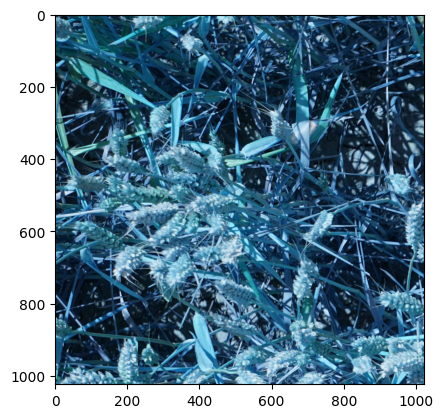

In [4]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [5]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [6]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [7]:
df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

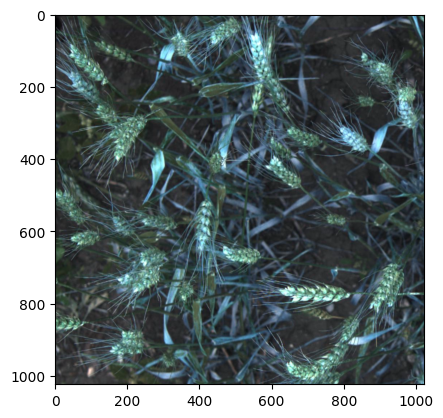

In [8]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

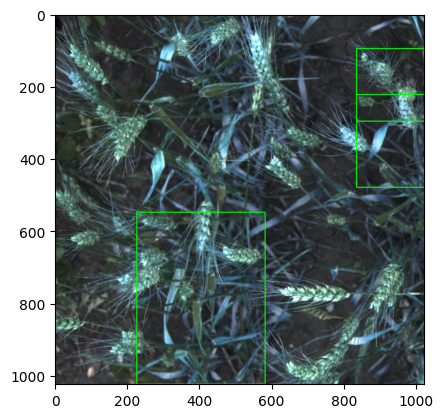

In [9]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


Let's visualize one image with all the bboxes for that image

In [10]:
one_image_info = df[df['image_id']=='b53afdf5c']
one_image_info.head()

,image_id,width,height,bbox,source
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1


In [11]:
(one_image_info['bbox'].iloc[0][0])

'['

In [12]:
one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
one_image_info['X_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]))
one_image_info['y_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]))
one_image_info['W'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2]))
one_image_info['H'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3]))

/tmp/ipykernel_23/2839306267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
/tmp/ipykernel_23/2839306267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
/tmp/ipykernel_23/2839306267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [13]:
one_image_info

,image_id,width,height,bbox,source,X_min,y_min,X_max,y_max,W,H
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1,988.0,781.0,1024.0,877.0,36.0,96.0
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1,331.0,863.0,401.0,958.0,70.0,95.0
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1,47.0,226.0,112.0,272.0,65.0,46.0
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1,682.0,974.0,790.0,1024.0,108.0,50.0
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1,63.0,988.0,219.0,1024.0,156.0,36.0
52,b53afdf5c,1024,1024,"[824.0, 901.0, 49.0, 77.0]",usask_1,824.0,901.0,873.0,978.0,49.0,77.0
53,b53afdf5c,1024,1024,"[815.0, 413.0, 90.0, 72.0]",usask_1,815.0,413.0,905.0,485.0,90.0,72.0
54,b53afdf5c,1024,1024,"[468.0, 161.0, 172.0, 66.0]",usask_1,468.0,161.0,640.0,227.0,172.0,66.0
55,b53afdf5c,1024,1024,"[888.0, 537.0, 76.0, 74.0]",usask_1,888.0,537.0,964.0,611.0,76.0,74.0
56,b53afdf5c,1024,1024,"[3.0, 88.0, 106.0, 69.0]",usask_1,3.0,88.0,109.0,157.0,106.0,69.0


In [14]:
bboxes = one_image_info[['X_min','y_min','X_max','y_max']].values

In [15]:
for bbox in bboxes:
    # print(bbox)
    x1,y1,x2,y2 = bbox
    # print(x1,y1,x2,y2)
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(0,255,0),2)

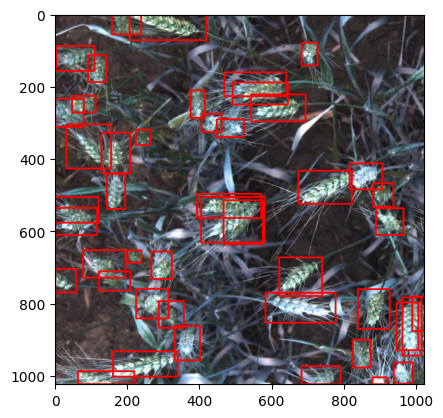

In [16]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b53afdf5c.jpg')
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    

In [17]:
import random

In [18]:
#Let's do this for a random picture

random.choice(df['image_id'].unique())

'af32eb10c'

/tmp/ipykernel_23/500449650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_info['X_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]));
/tmp/ipykernel_23/500449650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_info['y_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]));
/tmp/ipykernel_23/500449650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

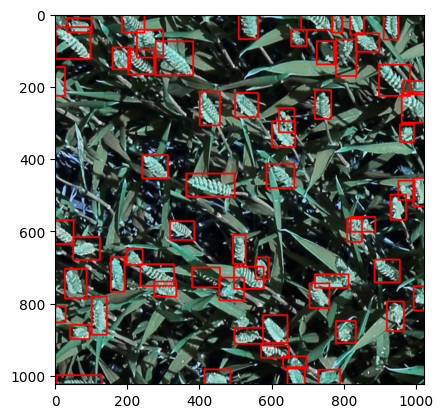

In [19]:
#function for creating the image with boxes
random_image_id = random.choice(df['image_id'].unique())
image_info = df[df['image_id']==random_image_id]
image_info['X_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]));
image_info['y_min'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]));
image_info['X_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]));
image_info['y_max'] = image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]));
bboxes = image_info[['X_min','y_min','X_max','y_max']].values
image = cv2.imread(f'/kaggle/input/global-wheat-detection/train/{random_image_id}.jpg')
# image/=255
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)
    


Visualizing the picture is done.

In [20]:
len(os.listdir('/kaggle/input/global-wheat-detection/test'))

10

Next steps:
1. Create a custom dataset
2. Create a NN model
3. Train and validate

In [21]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader
from torchvision.transforms import functional as F

In [22]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [23]:
import ast

In [24]:
type(df['bbox'].iloc[10])

str

In [25]:
box = df['bbox'].apply(ast.literal_eval).iloc[10]

In [26]:
# df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [27]:
#pre-process the df to make it easier to create bbox
def preprocess(df_any):
    #convert the bboxes str -> list
    df_any['bbox'] = df_any['bbox'].apply(ast.literal_eval)
    df_any[['x1','y1','width','height']] = pd.DataFrame(df_any['bbox'].tolist(),index = df.index)
    df_any['x2'] = df_any['x1']+df_any['width']
    df_any['y2'] = df_any['y1']+df_any['height']
    return df_any
    

In [28]:
processed_df = preprocess(df)

In [29]:
processed_df.head()

,image_id,width,height,bbox,source,x1,y1,x2,y2
0,b6ab77fd7,56.0,36.0,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0,890.0,258.0
1,b6ab77fd7,130.0,58.0,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0,356.0,606.0
2,b6ab77fd7,74.0,160.0,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0,451.0,664.0
3,b6ab77fd7,109.0,107.0,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0,943.0,202.0
4,b6ab77fd7,124.0,117.0,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0,150.0,261.0


In [30]:
b = processed_df[processed_df['image_id']=='b6ab77fd7'][['x1','y1','x2','y2']].values

In [31]:
df.shape[0]

147793

In [32]:
torch.ones(df.shape[0]) == torch.ones(df.shape[0],)

tensor([True, True, True,  ..., True, True, True])

In [33]:
b1 = torch.as_tensor(b,dtype = torch.float32)

In [34]:
-b1[:,1]+b1[:,3]

tensor([ 36.,  58., 160., 107., 117., 111.,  45.,  75.,  82., 103., 133.,  46.,
         83.,  91.,  93., 130.,  76.,  64.,  75.,  49.,  48.,  46.,  58.,  70.,
         64.,  72.,  70.,  91., 224., 138.,  75.,  83.,  41.,  71.,  60.,  74.,
         84., 158., 120.,  43., 136.,  38.,  31.,  81., 121.,  45.,  20.])

In [35]:
class WheatDataset(Dataset):
    def __init__(self,df,image_dir,transforms=None):
        self.df = df
        self.image_dir = image_dir
        self.transforms = transforms

    def __len__(self):
        return self.df['image_id'].nunique()

    def __getitem__(self,idx):
        image_id = self.df['image_id'].unique()[idx]

        #load image
        image_path = os.path.join(self.image_dir,f"{image_id}.jpg")
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        #Getting bounding box co-ordinates for the image
        image_df = self.df[self.df['image_id']==image_id]
        boxes = image_df[['x1','y1','x2','y2']].values

        target = {
            'boxes':torch.as_tensor(boxes,dtype = torch.float32),
            'labels':torch.ones((image_df.shape[0],),dtype = torch.int64),
            'image_id':torch.tensor([idx],dtype = torch.int64),
            'area': torch.as_tensor((boxes[:,2]-boxes[:,0])*(boxes[:,3]-boxes[:,1]),dtype = torch.float32),
            'iscrowd':torch.zeros(image_df.shape[0],dtype = torch.int64) #as all are single objects
        }

        if self.transforms:
            augmented = self.transforms(image = image,bboxes = target['boxes'].tolist(),labels = target['labels'].tolist())
            image = augmented['image']
            target['boxes'] = torch.tensor(augmented['bboxes'])
        # if self.transforms:
        #     sample = {
        #         'image':image,
        #         'bboxes': target['boxes'].tolist(),
        #         'labels': target['labels'].tolist()}
        #     print(sample)
        #     sample = self.transforms(**sample)
        #     print(sample)
        #     image = sample['image']
        #     # target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)
        #     target['boxes'] = torch.tensor(sample['bboxes'],dtype = torch.float32)
        #     target['labels'] = torch.tensor(sample['labels'],dtype = torch.int64)

        # # Ensure image is converted to PyTorch tensor
        #     if not isinstance(image, torch.Tensor):
        #         image = F.to_tensor(image)
        # image = F.to_tensor(image) #This is also converting the image within 0..1
        return image,target
        

In [36]:
import albumentations as A
# from albumentations.pytorch.transforms import ToTensorV2
from albumentations.pytorch import ToTensorV2


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [37]:
transform_func = A.Compose([
    A.RandomCrop(width=450,height=450,p=0.25),
    A.Resize(height=512,width=512,p=1.0),
    ToTensorV2(p=1.0)
])

In [38]:
def get_transform(train):
    if train:
        return A.Compose([
            # A.Flip(0.5),
            A.Resize(height=512,width=512,p=1.0),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0),
        ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=['labels']))

    else:
        return A.Compose([
            # A.Flip(0.5),
            A.Resize(height=512,width=512,p=1.0),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0)
        ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=['labels']))
        

In [39]:
train_dir = '/kaggle/input/global-wheat-detection/train'

In [40]:
train_data = WheatDataset(processed_df,train_dir,transforms=get_transform(train=True)) #=get_transform(train=True)
valid_data = WheatDataset(processed_df,train_dir,transforms=get_transform(train=False))


In [41]:
valid_data[0]

(tensor([[[-1.6555, -1.4843, -1.3302,  ..., -1.0048, -0.9363, -0.9020],
          [-1.7412, -1.5870, -1.4672,  ..., -0.9705, -0.9877, -0.9877],
          [-1.7925, -1.6898, -1.5870,  ..., -0.7822, -0.9363, -0.9363],
          ...,
          [-1.1247, -1.1418, -1.1247,  ...,  1.1700,  1.2043,  0.9646],
          [-1.1589, -1.1760, -1.1589,  ...,  1.2728,  1.5982,  1.6495],
          [-1.0733, -1.1075, -1.1247,  ...,  0.8104,  1.1358,  1.2728]],
 
         [[-1.5980, -1.4230, -1.2654,  ..., -0.4251, -0.4076, -0.3725],
          [-1.6856, -1.5280, -1.4055,  ..., -0.4776, -0.4426, -0.4076],
          [-1.7381, -1.6331, -1.5280,  ..., -0.3725, -0.3901, -0.3200],
          ...,
          [-1.0203, -1.0378, -1.0203,  ...,  1.0105,  1.1506,  0.9580],
          [-1.0553, -1.0728, -1.0553,  ...,  1.0630,  1.5182,  1.6232],
          [-0.9678, -1.0028, -1.0203,  ...,  0.6078,  1.0280,  1.2381]],
 
         [[-1.3513, -1.1770, -1.0201,  ..., -0.6018, -0.6367, -0.6541],
          [-1.4384, -1.2816,

In [42]:
indices = np.arange(len(train_data))
np.random.shuffle(indices)

In [43]:
split = int(0.8*len(indices))

In [44]:
train_indices = indices[:split]
valid_indices = indices[split:]

In [45]:
from torch.utils.data import Subset

In [46]:
train_subset = Subset(train_data,train_indices)
valid_subset = Subset(valid_data,valid_indices)

In [47]:
train_loader = DataLoader(train_subset,batch_size=8,shuffle= True,num_workers=4,collate_fn = lambda x: tuple(zip(*x))) #very important to use collate_fn
valid_loader = DataLoader(valid_subset,batch_size=8,shuffle = False,num_workers=4,collate_fn = lambda x: tuple(zip(*x)))

**Why Use collate_fn?**


Object detection datasets often return images and targets of varying shapes. A custom collate_fn like tuple(zip(*x)) ensures the DataLoader batches them correctly.

In [48]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
# ,ssd300_vgg16
# from torchvision.models.detection.backbone_utils import BackboneWithFPN, mobilenet_backbone

In [49]:
model = fasterrcnn_resnet50_fpn(pretrained = True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 199MB/s] 


In [50]:
num_classes = 2
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features,num_classes)


In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [52]:
from torch import optim

In [53]:
#hyperparameters
optimizer = optim.SGD(model.parameters(),lr=1e-03)

In [54]:
#Training loop
for epoch in range(5):
    model.train()
    epoch_loss = 0

    for images,labels in train_loader:
        # print(f"Batch size (number of images): {len(images)}")
        images = [image.to(device) for image in images]
        labels = [{k:v.to(device) for k,v in t.items()} for t in labels]

        loss_dict = model(images,labels)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
        optimizer.zero_grad()
        torch.cuda.empty_cache()


    print(f'Epoch: {epoch} | Loss: {epoch_loss/len(train_loader)}')

        

Epoch: 0 | Loss: 1.3734858547442057
Epoch: 1 | Loss: 1.1305433217237686
Epoch: 2 | Loss: 1.0532358615003394
Epoch: 3 | Loss: 1.0085328926701518
Epoch: 4 | Loss: 0.9782982117678287


In [55]:
#model
model.eval()
with torch.no_grad():
    for images,targets in valid_loader:
        images = [image.to(device) for image in images]
        predictions = model(images)

        images_np = [tensor_to_image(image) for image in images]
        predicted_boxes = [pred['boxes'].cpu().numpy() for pred in predictions]
        predicted_labels = [pred['labels'].cpu().numpy() for pred in predictions]

NameError: name 'tensor_to_image' is not defined

In [ ]:
for pred in predictions:
    print (pred)
    break